In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('bovino_monthly.csv')

In [3]:
df.head()

DATAFLOW        LAST UPDATE     freq         meat  \
0  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
1  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
3  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
4  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   

        meatitem             unit      geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  Slaughterings  Thousand tonnes  Albania     2015-01       0.66      NaN  
1  Slaughterings  Thousand tonnes  Albania     2015-02       0.58      NaN  
2  Slaughterings  Thousand tonnes  Albania     2015-03       0.67      NaN  
3  Slaughterings  Thousand tonnes  Albania     2015-04       0.68      NaN  
4  Slaughterings  Thousand tonnes  Albania     2015-05       0.71      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254 entries, 0 to 6253
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     6254 non-null   object 
 1   LAST UPDATE  6254 non-null   object 
 2   freq         6254 non-null   object 
 3   meat         6254 non-null   object 
 4   meatitem     6254 non-null   object 
 5   unit         6254 non-null   object 
 6   geo          6254 non-null   object 
 7   TIME_PERIOD  6254 non-null   object 
 8   OBS_VALUE    6246 non-null   float64
 9   OBS_FLAG     475 non-null    object 
dtypes: float64(1), object(9)
memory usage: 488.7+ KB


In [5]:
df['geo'].unique()

array(['Albania', 'Austria', 'Bosnia and Herzegovina', 'Belgium',
       'Bulgaria', 'Switzerland', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Estonia', 'Greece', 'Spain',
       'European Union - 27 countries (from 2020)', 'Finland', 'France',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Montenegro', 'North Macedonia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden',
       'Slovenia', 'Slovakia', 'Türkiye', 'United Kingdom', 'Kosovo*'],
      dtype=object)

In [6]:
df['TIME_PERIOD'].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', 

In [7]:
df.isnull().sum()

DATAFLOW          0
LAST UPDATE       0
freq              0
meat              0
meatitem          0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE         8
OBS_FLAG       5779
dtype: int64

In [8]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

                       DATAFLOW        LAST UPDATE     freq         meat  \
0     ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
1     ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2     ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
3     ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
4     ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
...                         ...                ...      ...          ...   
6249  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
6250  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
6251  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
6252  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
6253  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   

           meatitem             unit      geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     S

In [9]:
#I need to drop OBS_FLAG first
df = df.drop(['OBS_FLAG'], axis=1)

In [10]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

                       DATAFLOW        LAST UPDATE     freq         meat  \
595   ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
597   ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
599   ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
1662  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2147  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2149  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2151  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   
2191  ESTAT:APRO_MT_PHEADM(1.0)  27/11/24 23:00:00  Monthly  Bovine meat   

           meatitem             unit  \
595   Slaughterings  Thousand tonnes   
597   Slaughterings  Thousand tonnes   
599   Slaughterings  Thousand tonnes   
1662  Slaughterings  Thousand tonnes   
2147  Slaughterings  Thousand tonnes   
2149  Slaughterings  Thousand tonnes   
2151  Slaughterings  Thousand tonne

In [11]:
#filtered_data = df[df['TIME_PERIOD'] == 2014]

# Display the filtered rows
#print(filtered_data)

In [12]:
#I will drop all the rows EU27_2020, cause I want to compare countries only 
df = df[df['geo'] != 'European Union - 27 countries (from 2020)']

In [13]:
df.loc[:,'OBS_VALUE'] = df['OBS_VALUE'].fillna(0)

In [14]:
# I want to be sure is EU27_2020 means the total of all countries
total_value = df[df['TIME_PERIOD'] == 2015]['OBS_VALUE'].sum()
total_value = total_value - 6701.96
# Print the result
print(f"Total Value for period 2015: {total_value}")

Total Value for period 2015: -6701.96


In [15]:
df.isnull().sum()

DATAFLOW       0
LAST UPDATE    0
freq           0
meat           0
meatitem       0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [16]:
# I will drop collumns DATAFLOW, LAST UPDATE, freq, unit, meatitem, meat
df = df.drop(['DATAFLOW','LAST UPDATE','freq','unit','meatitem','meat'], axis=1)

In [17]:
df.head()

geo TIME_PERIOD  OBS_VALUE
0  Albania     2015-01       0.66
1  Albania     2015-02       0.58
2  Albania     2015-03       0.67
3  Albania     2015-04       0.68
4  Albania     2015-05       0.71

In [18]:
df.rename(columns={'geo': 'Country','TIME_PERIOD':'Year','OBS_VALUE':'Value'}, inplace=True)

In [19]:
df['Year'] = pd.to_datetime(df['Year'])  # Convert to datetime format

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6078 entries, 0 to 6253
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  6078 non-null   object        
 1   Year     6078 non-null   datetime64[ns]
 2   Value    6078 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 189.9+ KB


In [21]:
df.head()

Country       Year  Value
0  Albania 2015-01-01   0.66
1  Albania 2015-02-01   0.58
2  Albania 2015-03-01   0.67
3  Albania 2015-04-01   0.68
4  Albania 2015-05-01   0.71

In [22]:
import pycountry

# Create a function to convert country Name to country ISO_code
def get_alpha_3(country_code):
    #using try to avoid error in case doesnt find country code
    try:
        return pycountry.countries.lookup(country_code).alpha_3
    except LookupError:
        return None  # Handle invalid country names gracefully

# Apply the function in the dataframe
df['ISO_Code'] = df['Country'].apply(get_alpha_3)
df

Country       Year  Value ISO_Code
0     Albania 2015-01-01   0.66      ALB
1     Albania 2015-02-01   0.58      ALB
2     Albania 2015-03-01   0.67      ALB
3     Albania 2015-04-01   0.68      ALB
4     Albania 2015-05-01   0.71      ALB
...       ...        ...    ...      ...
6249  Kosovo* 2023-08-01   0.54     None
6250  Kosovo* 2023-09-01   0.38     None
6251  Kosovo* 2023-10-01   0.73     None
6252  Kosovo* 2023-11-01   0.61     None
6253  Kosovo* 2023-12-01   1.18     None

[6078 rows x 4 columns]

In [23]:
null_data = df[df.isnull().any(axis=1)]
null_data['Country'].unique()

array(['Kosovo*'], dtype=object)

In [24]:
#According to the database structuer (https://ec.europa.eu/eurostat/databrowser/product/page/tag00044) 
# Kosovo iso_code is XKX
df.loc[df['Country'] == 'Kosovo*', 'ISO_Code'] = 'XKX'

In [25]:
null_data = df[df.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [Country, Year, Value, ISO_Code]
Index: []

In [26]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [Country, Year, Value, ISO_Code]
Index: []


In [27]:
df.head()

Country       Year  Value ISO_Code
0  Albania 2015-01-01   0.66      ALB
1  Albania 2015-02-01   0.58      ALB
2  Albania 2015-03-01   0.67      ALB
3  Albania 2015-04-01   0.68      ALB
4  Albania 2015-05-01   0.71      ALB

In [28]:
df.tail()

Country       Year  Value ISO_Code
6249  Kosovo* 2023-08-01   0.54      XKX
6250  Kosovo* 2023-09-01   0.38      XKX
6251  Kosovo* 2023-10-01   0.73      XKX
6252  Kosovo* 2023-11-01   0.61      XKX
6253  Kosovo* 2023-12-01   1.18      XKX

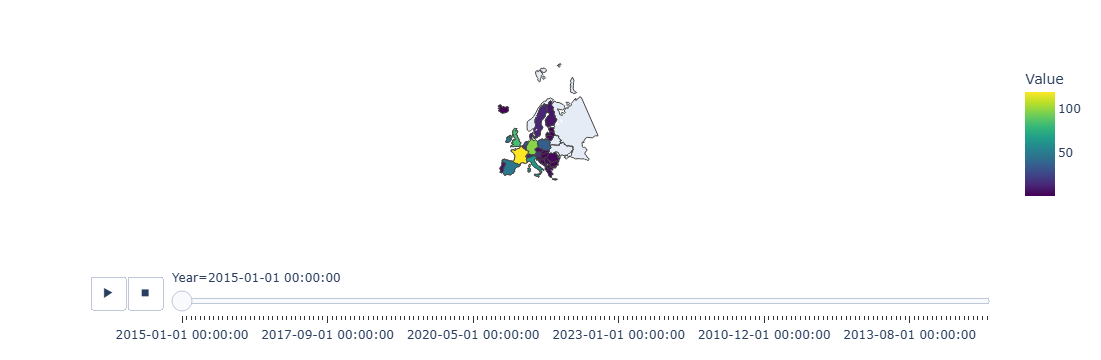

In [29]:
fig= px.choropleth(df, locations="ISO_Code", color="Value",
                   hover_name = 'Country',
                   animation_frame = 'Year',
                   color_continuous_scale = px.colors.sequential.Viridis)
fig.update_layout(geo_scope='europe')

fig.show()

In [30]:
df = df.sort_values(by="Year")  # Ascending order

In [31]:
df['Year_Month'] = df['Year'].dt.strftime('%Y-%m')  # Extract Year and Month in 'YYYY-MM' format

In [32]:
df

Country       Year  Value ISO_Code Year_Month
1963        Spain 2010-01-01  47.14      ESP    2010-01
4486  Netherlands 2010-01-01  27.48      NLD    2010-01
3354        Italy 2010-01-01  95.76      ITA    2010-01
1256      Germany 2010-01-01  93.91      DEU    2010-01
4662       Poland 2010-01-01  22.81      POL    2010-01
...           ...        ...    ...      ...        ...
5521       Sweden 2024-09-01  12.26      SWE    2024-09
3884   Luxembourg 2024-09-01   0.78      LUX    2024-09
2491      Finland 2024-09-01   7.34      FIN    2024-09
3353      Iceland 2024-10-01   0.50      ISL    2024-10
586       Belgium 2024-10-01  21.99      BEL    2024-10

[6078 rows x 5 columns]

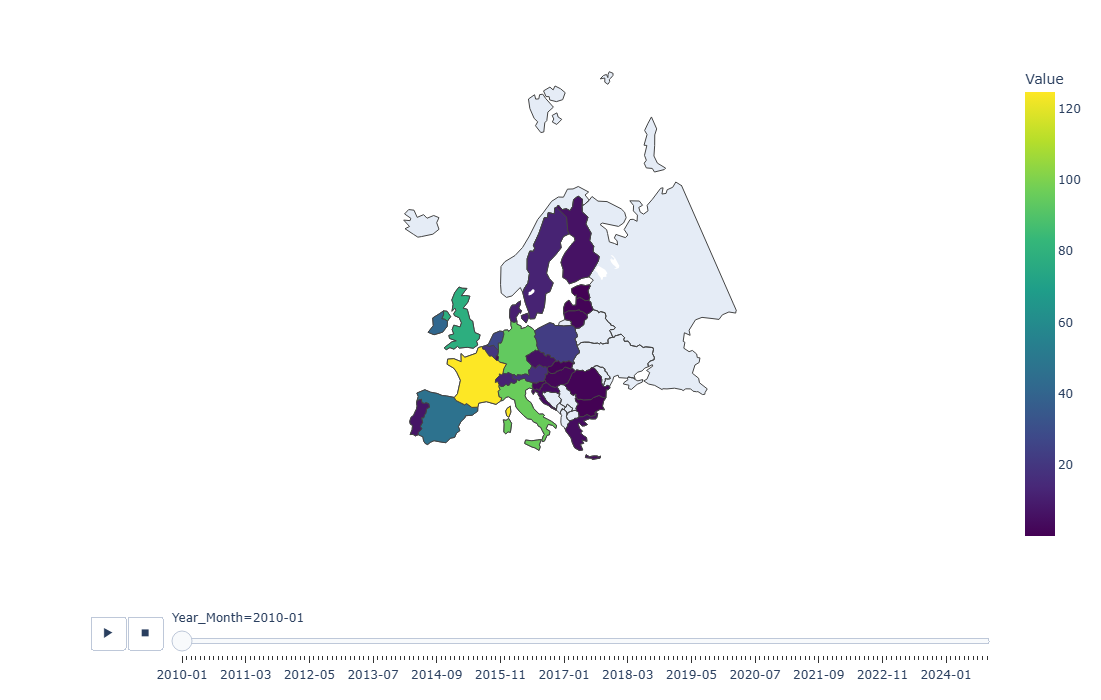

In [33]:
fig= px.choropleth(df, locations="ISO_Code", color="Value",
                   hover_name = 'Country',
                   animation_frame = 'Year_Month',
                   color_continuous_scale = px.colors.sequential.Viridis)
fig.update_layout(geo_scope='europe',width=1000, height=700)

fig.show()

In [34]:
# alot of countries are missing value in the table but not showing as NAN, cause the rows are not in the table,
# they just start at 2015
df['Country'].value_counts()

Country
Belgium                   178
Latvia                    177
Malta                     177
Finland                   177
Lithuania                 177
Czechia                   177
Estonia                   177
Croatia                   177
Sweden                    177
Hungary                   177
France                    177
Romania                   177
Denmark                   177
Ireland                   177
Portugal                  177
Luxembourg                177
Cyprus                    177
Germany                   177
Italy                     177
Spain                     176
Slovakia                  176
Austria                   176
Netherlands               176
Greece                    176
Slovenia                  176
Bulgaria                  176
Poland                    176
Iceland                   154
Türkiye                   153
Serbia                    153
Switzerland               139
United Kingdom            131
Montenegro                128
No

In [35]:
df_short = df[df['Year'] > '2014-12-01']

df_short['Country'].value_counts()

Country
Iceland                   118
Belgium                   118
Finland                   117
Hungary                   117
Cyprus                    117
Germany                   117
Estonia                   117
Denmark                   117
Albania                   117
Portugal                  117
Türkiye                   117
Malta                     117
Italy                     117
Luxembourg                117
Latvia                    117
Czechia                   117
Serbia                    117
Sweden                    117
Romania                   117
France                    117
Lithuania                 117
Croatia                   117
Ireland                   117
Bosnia and Herzegovina    116
Greece                    116
Austria                   116
Bulgaria                  116
Slovakia                  116
Slovenia                  116
Poland                    116
Spain                     116
Netherlands               116
Montenegro                116
Sw

In [36]:
df_short = df_short[df_short['Year'] < '2024-09-01']

df_short['Country'].value_counts()

Country
Finland                   116
Denmark                   116
Netherlands               116
Spain                     116
Malta                     116
Türkiye                   116
Portugal                  116
Albania                   116
Estonia                   116
Luxembourg                116
Bulgaria                  116
Austria                   116
Belgium                   116
Greece                    116
Germany                   116
Cyprus                    116
Italy                     116
Czechia                   116
Ireland                   116
Romania                   116
Hungary                   116
Slovakia                  116
Iceland                   116
Poland                    116
Slovenia                  116
Croatia                   116
Latvia                    116
Serbia                    116
Sweden                    116
Lithuania                 116
France                    116
Montenegro                115
Bosnia and Herzegovina    115
Sw

In [37]:
#I will remove countries with less than 116

countries_to_drop = [
    'Switzerland', 'Montenegro', 'North Macedonia', 
    'Bosnia and Herzegovina', 'Kosovo*','United Kingdom'
]

# Drop rows where the 'Country' column matches any of the countries in the list
df_short = df_short[~df_short['Country'].isin(countries_to_drop)]

# Check the remaining rows
print(df_short['Country'].value_counts()) 

Country
Finland        116
Netherlands    116
Cyprus         116
Germany        116
Greece         116
Belgium        116
Austria        116
Bulgaria       116
Estonia        116
Denmark        116
Albania        116
Portugal       116
Türkiye        116
Malta          116
Spain          116
Italy          116
Iceland        116
Luxembourg     116
Latvia         116
Hungary        116
Slovakia       116
Poland         116
Slovenia       116
Croatia        116
Ireland        116
Serbia         116
Sweden         116
Lithuania      116
France         116
Romania        116
Czechia        116
Name: count, dtype: int64


        Country     Value
0       Albania     71.82
1       Austria   2122.60
2       Belgium   2513.91
3      Bulgaria     64.04
4       Croatia    414.61
5        Cyprus     51.48
6       Czechia    680.95
7       Denmark   1183.54
8       Estonia     83.63
9       Finland    829.08
10       France  13626.53
11      Germany  10404.77
12       Greece    360.19
13      Hungary    260.76
14      Iceland     47.24
15      Ireland   5849.39
16        Italy   7217.64
17       Latvia    153.61
18    Lithuania    408.48
19   Luxembourg     94.16
20        Malta     10.43
21  Netherlands   4128.55
22       Poland   5245.79
23     Portugal    928.20
24      Romania    411.47
25       Serbia    429.71
26     Slovakia     77.46
27     Slovenia    338.19
28        Spain   6576.98
29       Sweden   1324.24
30      Türkiye   4532.81


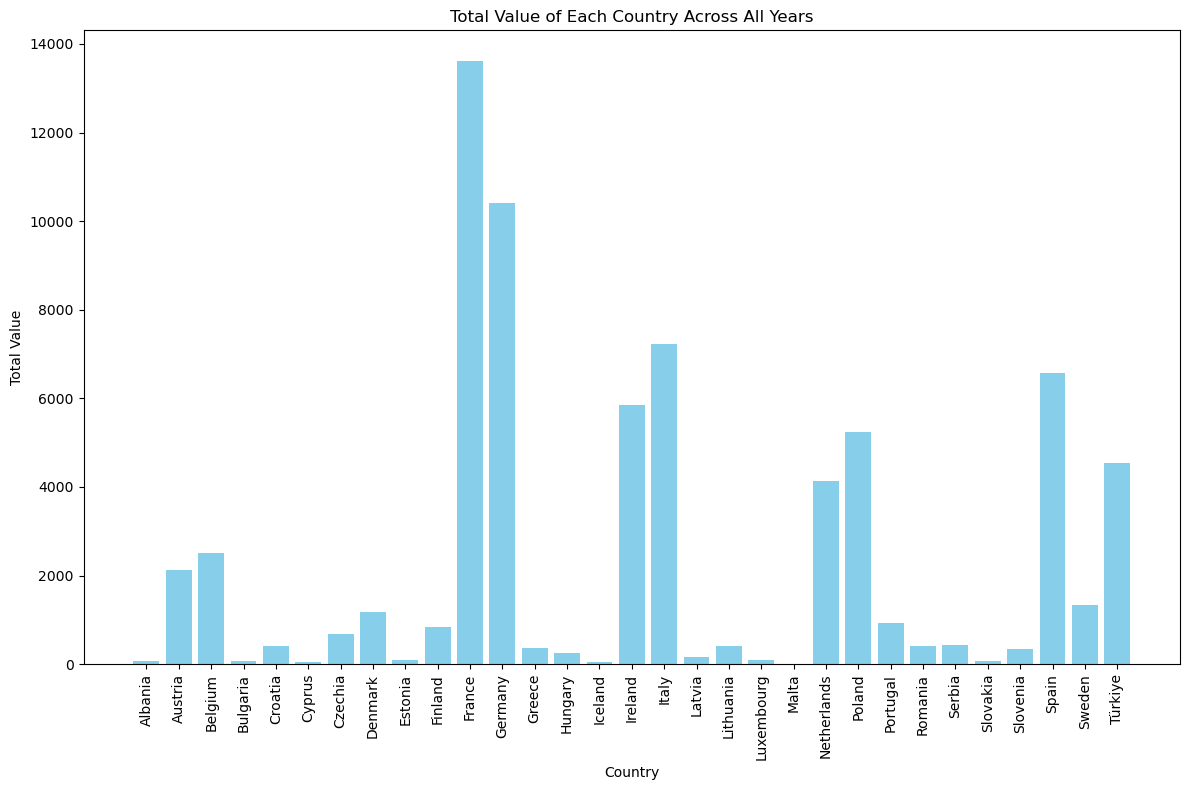

In [38]:
import matplotlib.pyplot as plt
# Group by 'Country' and sum the 'Value' column for each country
country_sum = df_short.groupby('Country')['Value'].sum().reset_index()

print(country_sum)

plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(country_sum['Country'], country_sum['Value'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Total Value of Each Country Across All Years')

plt.xticks(rotation=90) # it was not possible to read in 45
plt.tight_layout()  #prevent overlap

plt.show()

In [39]:
#I will apply Clustering to create groups and see with which countries it will be better to compare with Ireland

pivoted_data = df_short.pivot(index='Country', columns='Year', values='Value') #adapting the datas by country
pivoted_data

Year         2015-01-01  2015-02-01  2015-03-01  2015-04-01  2015-05-01  \
Country                                                                   
Albania            0.66        0.58        0.67        0.68        0.71   
Austria           18.93       17.14       20.49       18.66       17.26   
Belgium           21.74       19.51       22.64       21.66       21.01   
Bulgaria           0.42        0.46        0.38        0.40        0.38   
Croatia            3.13        2.95        3.46        3.14        3.45   
Cyprus             0.48        1.28        0.37        0.36        0.34   
Czechia            5.68        5.14        5.77        5.84        5.31   
Denmark           11.00        8.80       10.00        8.80        8.80   
Estonia            0.83        0.77        0.81        0.79        0.76   
Finland            7.18        6.88        7.33        6.74        6.29   
France           119.82      106.52      135.03      117.65      117.08   
Germany           98.00       89.00      102.00       88.00       81.00   
Greece             3.45        3.44        3.17        3.39        3.52   
Hungary            2.22        2.10        1.91        2.56        1.85   
Iceland            0.30        0.30        0.30        0.20        0.00   
Ireland           47.21       45.42       48.83       45.59       43.05   
Italy             63.51       59.57       67.90       59.57       62.36   
Latvia             1.38        1.19        1.40        1.45        1.33   
Lithuania          3.06        3.19        3.71        3.96        3.54   
Luxembourg         0.78        0.70        0.78        0.74        0.67   
Malta              0.09        0.09        0.09        0.09        0.08   
Netherlands       32.15       28.29       32.97       29.03       28.39   
Poland            35.52       33.67       42.27       36.22       38.12   
Portugal           6.39        5.67        7.05        6.70        7.31   
Romania            2.26        2.55        3.33        3.56        3.40   
Serbia             2.98        2.82        3.06        3.32        3.27   
Slovakia           0.72        0.70        0.75        0.71        0.60   
Slovenia           2.59        2.27        2.91        2.70        2.50   
Spain             47.81       45.08       50.18       49.38       51.46   
Sweden            12.37       11.51       11.90       11.40       10.96   
Türkiye           32.25       30.04       35.89       35.27       40.44   

Year         2015-06-01  2015-07-01  2015-08-01  2015-09-01  2015-10-01  ...  \
Country                                                                  ...   
Albania            0.66        0.68        0.70        0.81        0.78  ...   
Austria           17.97       17.38       17.78       20.61       20.70  ...   
Belgium           25.59       20.18       21.52       22.92       23.42  ...   
Bulgaria           0.34        0.35        0.42        0.46        0.51  ...   
Croatia            3.65        3.84        3.94        3.94        3.66  ...   
Cyprus             0.39        0.32        0.32        0.46        0.46  ...   
Czechia            5.59        5.16        5.25        5.92        6.22  ...   
Denmark           10.90        7.70       10.50       11.80       11.10  ...   
Estonia            0.69        0.79        0.75        0.88        0.88  ...   
Finland            6.72        7.06        6.98        7.71        7.89  ...   
France           121.89      112.26      125.23      127.73      120.85  ...   
Germany           91.00       85.00       81.00      103.00      104.00  ...   
Greece             3.55        3.60        3.66        3.80        3.51  ...   
Hungary            2.11        2.25        2.03        2.41        2.23  ...   
Iceland            0.30        0.40        0.30        0.30        0.40  ...   
Ireland           44.45       49.08       45.50       50.27       48.85  ...   
Italy             66.21       66.42       65.79       68.64       66.64  ...   
Latv

In [40]:
from sklearn.preprocessing import StandardScaler


#EXPLAIN WHY AM I DOING THIS




#I believe it wont be necessary but I will apply StandardScaler to the date,just to be sure the clustering is not biased 
#by countries with larger values or scales
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivoted_data.fillna(0))  # Handle missing values if any

In [41]:
normalized_data.shape

(31, 116)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

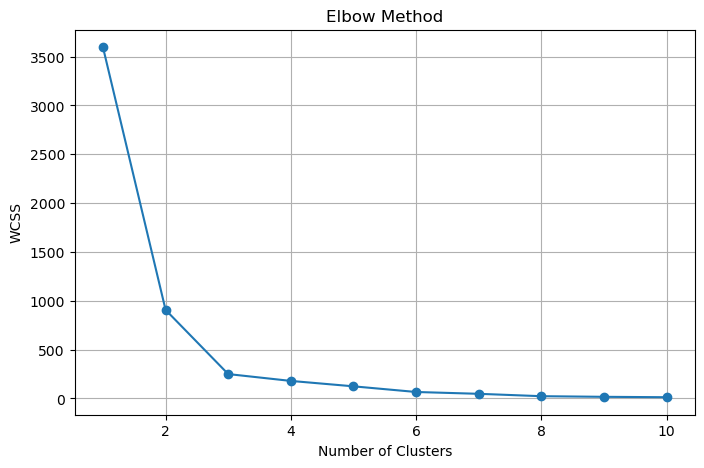

In [42]:
from sklearn.cluster import KMeans
wcss = [] #Within-Cluster Sum of Squares, to indicate how well the clusters will be generated
max_clusters = 10  # Maximum number of clusters to evaluate

# Compute WCSS for each number of clusters
for i in range(1, max_clusters + 1): #it will start in 1 and it will stop before 11
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)  # Using scaled data 
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
#the best cluster amount is 3



kmeans = KMeans(n_clusters=3, random_state=42) # I will test creating 3 groups just to see where Ireland will stay.
labels = kmeans.fit_predict(normalized_data)

# cluster labels back to the dataset
pivoted_data['Cluster'] = labels

print_piv = pivoted_data.iloc[:,-3:]
print(print_piv)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Year         2024-07-01 00:00:00  2024-08-01 00:00:00  Cluster
Country                                                       
Albania                     0.54                 0.65        1
Austria                    15.83                15.16        1
Belgium                    19.46                21.10        1
Bulgaria                    0.49                 0.40        1
Croatia                     3.81                 3.62        1
Cyprus                      0.41                 0.39        1
Czechia                     5.16                 5.34        1
Denmark                     8.91                 9.73        1
Estonia                     0.61                 0.59        1
Finland                     7.13                 7.14        1
France                    108.48               100.42        0
Germany                    79.32                78.72        0
Greece                      2.82                 2.78        1
Hungary                     1.84                 1.87  

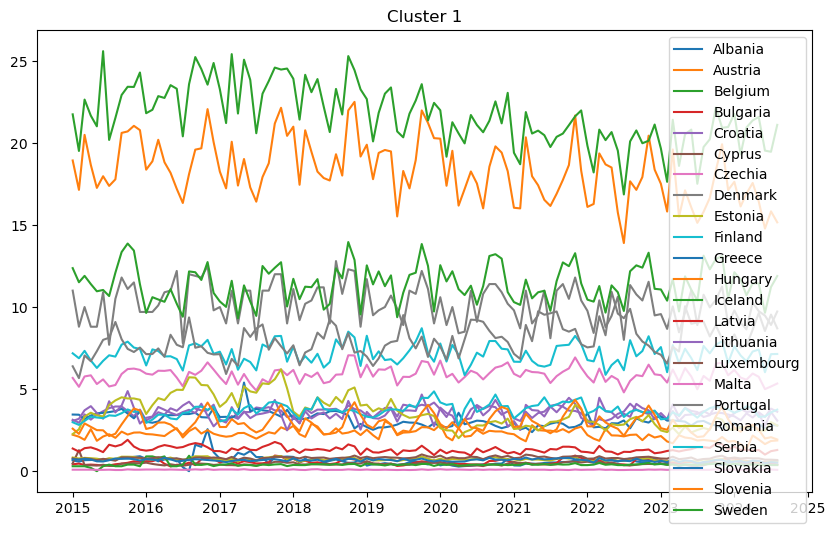

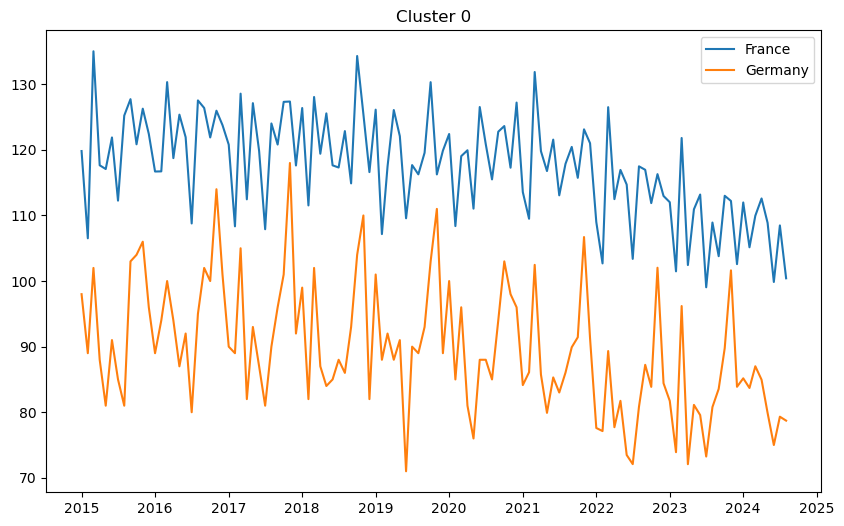

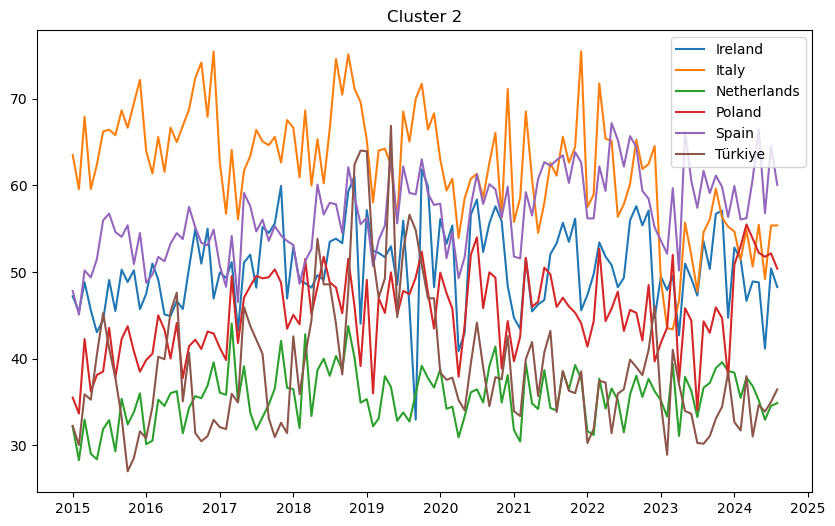

In [44]:
import seaborn as sns

# Plot time series for each cluster
for cluster_id in pivoted_data['Cluster'].unique():
    cluster_group = pivoted_data[pivoted_data['Cluster'] == cluster_id]
    plt.figure(figsize=(10, 6))
    cols_to_plot = cluster_group.columns[:-1]
    for country in cluster_group.index:
        plt.plot(cols_to_plot, cluster_group.loc[country, cols_to_plot], label=country)
    plt.title(f'Cluster {cluster_id}')
    plt.legend()
    plt.show()

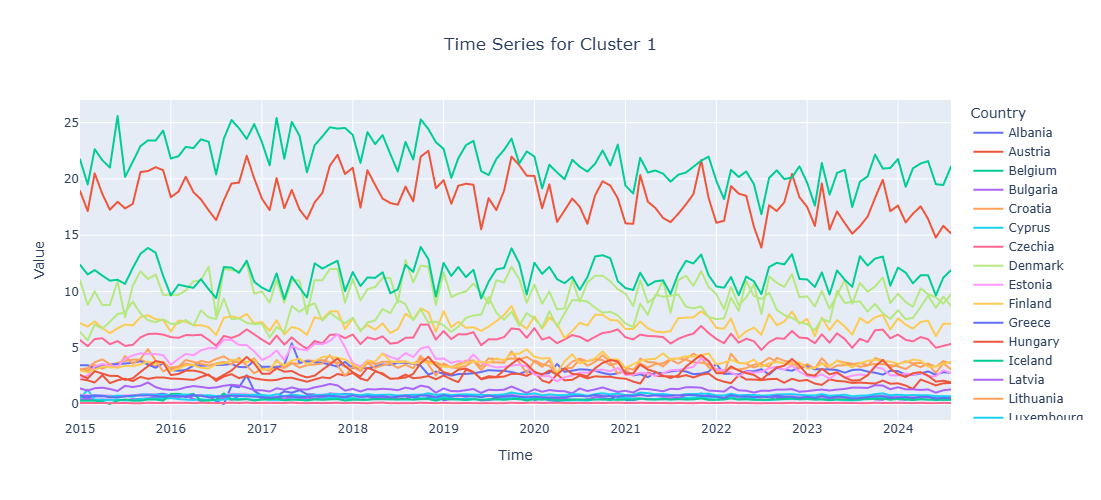

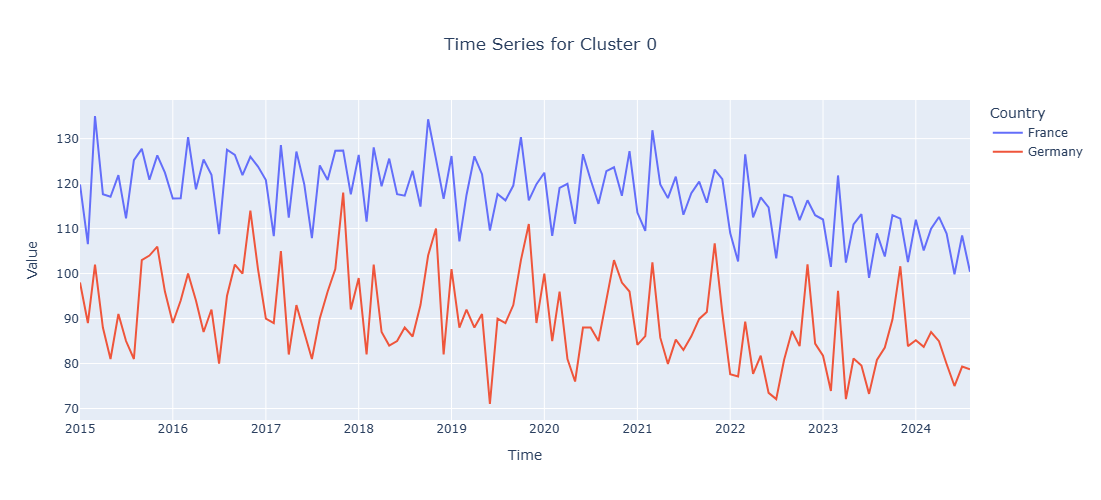

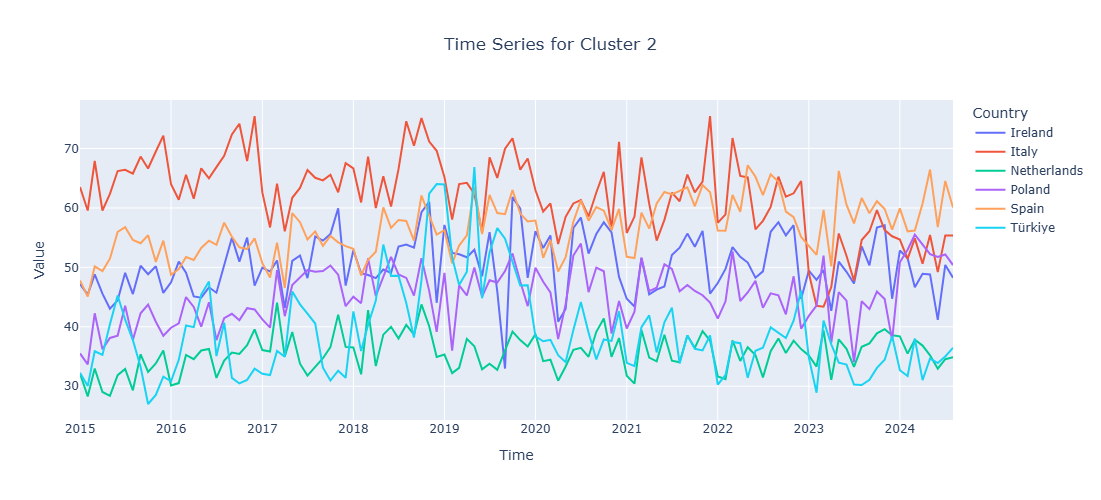

In [45]:
#Applying in a better layout with interaction

import plotly.express as px

# Melt the data
melted_data = pivoted_data.reset_index().melt(
    id_vars=['Country', 'Cluster'], 
    var_name='Time', 
    value_name='Value'
)

for cluster_id in melted_data['Cluster'].unique():
    cluster_group = melted_data[melted_data['Cluster'] == cluster_id]
    fig = px.line(
        cluster_group, 
        x='Time', 
        y='Value', 
        color='Country',
        title=f'Time Series for Cluster {cluster_id}'
    )
    fig.update_layout(
        xaxis_title="Time", 
        yaxis_title="Value",
        legend_title="Country",
        title_x=0.5,  # Center the title
        width=1000,   # Set figure width
        height=500    # Set figure height
    )
    fig.show()


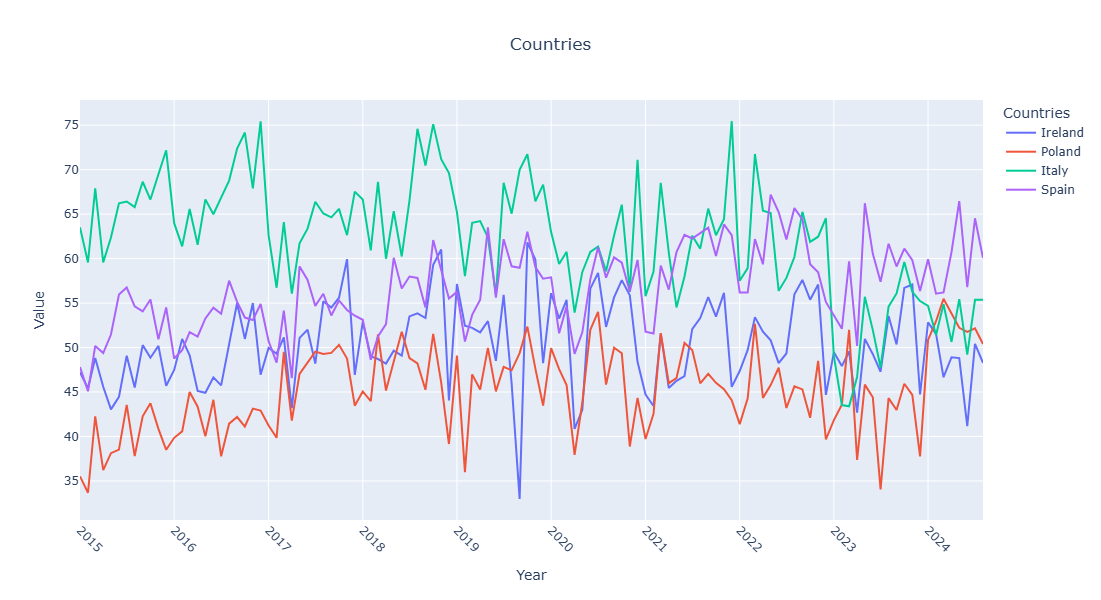

In [46]:
import plotly.express as px

# Filter the dataset for the selected countries
countries = ['Ireland', 'Italy', 'Spain', 'Poland']
filtered_df = df_short[df_short['Country'].isin(countries)]

def plot_simple(input):
    fig = px.line(
        input, 
        x='Year', 
        y='Value', 
        color='Country', 
        title='Countries'
    )
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="Value",
        legend_title="Countries",
        title_x=0.5,  
        width=1000,  
        height=600,  
        xaxis_tickangle=45 
    )
    fig.show()

plot_simple(filtered_df)

In [47]:
df_new = df_short[df_short['Country'].isin(['Italy', 'Spain', 'Ireland', 'Poland'])]
df_new

Country       Year  Value ISO_Code Year_Month
3083  Ireland 2015-01-01  47.21      IRL    2015-01
4722   Poland 2015-01-01  35.52      POL    2015-01
3414    Italy 2015-01-01  63.51      ITA    2015-01
2023    Spain 2015-01-01  47.81      ESP    2015-01
4723   Poland 2015-02-01  33.67      POL    2015-02
...       ...        ...    ...      ...        ...
4836   Poland 2024-07-01  52.16      POL    2024-07
4837   Poland 2024-08-01  50.39      POL    2024-08
3198  Ireland 2024-08-01  48.27      IRL    2024-08
3529    Italy 2024-08-01  55.37      ITA    2024-08
2138    Spain 2024-08-01  60.07      ESP    2024-08

[464 rows x 5 columns]

In [48]:
df_new.reset_index(drop=True, inplace=True)

In [49]:
df_new

Country       Year  Value ISO_Code Year_Month
0    Ireland 2015-01-01  47.21      IRL    2015-01
1     Poland 2015-01-01  35.52      POL    2015-01
2      Italy 2015-01-01  63.51      ITA    2015-01
3      Spain 2015-01-01  47.81      ESP    2015-01
4     Poland 2015-02-01  33.67      POL    2015-02
..       ...        ...    ...      ...        ...
459   Poland 2024-07-01  52.16      POL    2024-07
460   Poland 2024-08-01  50.39      POL    2024-08
461  Ireland 2024-08-01  48.27      IRL    2024-08
462    Italy 2024-08-01  55.37      ITA    2024-08
463    Spain 2024-08-01  60.07      ESP    2024-08

[464 rows x 5 columns]

In [50]:
df_new['Country'].value_counts()

Country
Ireland    116
Poland     116
Italy      116
Spain      116
Name: count, dtype: int64

In [51]:
#just to confirm if there are other values missing in the data. I will remove the last to rows cause Spain and Poland dont have data for 2024-09

#df_new = df_new.iloc[:-2]

print(df_new)

     Country       Year  Value ISO_Code Year_Month
0    Ireland 2015-01-01  47.21      IRL    2015-01
1     Poland 2015-01-01  35.52      POL    2015-01
2      Italy 2015-01-01  63.51      ITA    2015-01
3      Spain 2015-01-01  47.81      ESP    2015-01
4     Poland 2015-02-01  33.67      POL    2015-02
..       ...        ...    ...      ...        ...
459   Poland 2024-07-01  52.16      POL    2024-07
460   Poland 2024-08-01  50.39      POL    2024-08
461  Ireland 2024-08-01  48.27      IRL    2024-08
462    Italy 2024-08-01  55.37      ITA    2024-08
463    Spain 2024-08-01  60.07      ESP    2024-08

[464 rows x 5 columns]


In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     464 non-null    object        
 1   Year        464 non-null    datetime64[ns]
 2   Value       464 non-null    float64       
 3   ISO_Code    464 non-null    object        
 4   Year_Month  464 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 18.3+ KB


In [53]:
df_new['Value'].describe()

count    464.000000
mean      53.641810
std        8.322439
min       32.970000
25%       47.705000
50%       53.320000
75%       59.570000
max       75.470000
Name: Value, dtype: float64

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_new['Country_Encoded'] = le.fit_transform(df_new['Country'])

C:\Users\Leandro Andrade\AppData\Local\Temp\ipykernel_19180\4105034107.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_new

Country       Year  Value ISO_Code Year_Month  Country_Encoded
0    Ireland 2015-01-01  47.21      IRL    2015-01                0
1     Poland 2015-01-01  35.52      POL    2015-01                2
2      Italy 2015-01-01  63.51      ITA    2015-01                1
3      Spain 2015-01-01  47.81      ESP    2015-01                3
4     Poland 2015-02-01  33.67      POL    2015-02                2
..       ...        ...    ...      ...        ...              ...
459   Poland 2024-07-01  52.16      POL    2024-07                2
460   Poland 2024-08-01  50.39      POL    2024-08                2
461  Ireland 2024-08-01  48.27      IRL    2024-08                0
462    Italy 2024-08-01  55.37      ITA    2024-08                1
463    Spain 2024-08-01  60.07      ESP    2024-08                3

[464 rows x 6 columns]

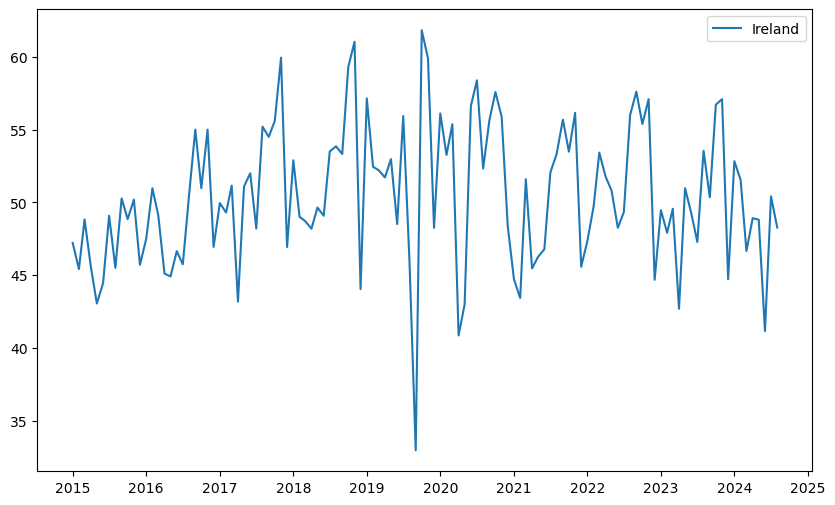

In [56]:
df_ire = df_new[df_new['Country_Encoded'] == 0]
df_ire.set_index('Year', inplace=True)
df_ire.index.freq = 'MS'  # Replace 'MS' with the appropriate frequency
plt.figure(figsize=(10, 6))
plt.plot(df_ire['Value'], label='Ireland')
plt.legend()
plt.show()

In [57]:
df_ire.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2015-01-01 to 2024-08-01
Freq: MS
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          116 non-null    object 
 1   Value            116 non-null    float64
 2   ISO_Code         116 non-null    object 
 3   Year_Month       116 non-null    object 
 4   Country_Encoded  116 non-null    int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 5.0+ KB


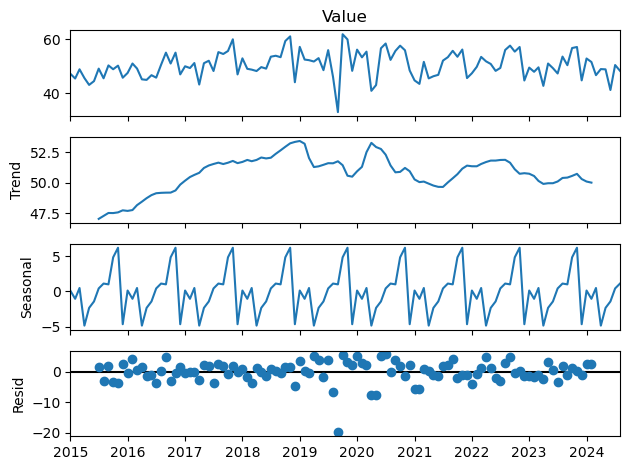

In [58]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df_ire['Value'],period=12,model='additive').plot() # using additive model cause the data is not increasing by time
plt.show()

In [59]:
#Checking if Ireland data is stationary
#This is important for a better prediction in time series data

def rolling_stat(input):
    rolling_mean = input.rolling(window=12).mean()
    rolling_std = input.rolling(window=12).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(input, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.legend()
    plt.show()

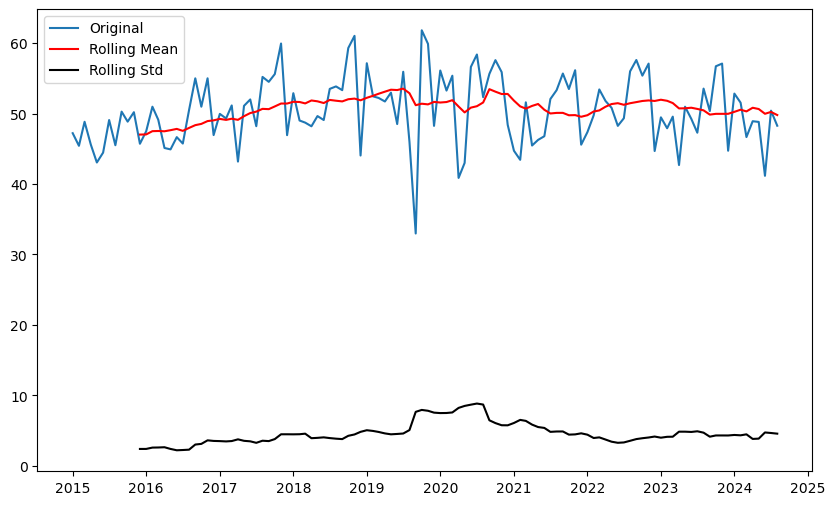

In [60]:
df_ire = df_new[df_new['Country_Encoded'] == 0]
df_ire.set_index('Year', inplace=True) # turn year as index so it will be automaticaly being using as X

rolling_stat(df_ire['Value'])

In [61]:
# it seems the time series is not stationary, but I will try another method
# Null Hypothesis: data is non-stationary

# critical value 5% > ADF Statistics
# p-value < 0.05

In [62]:
#As mean and standard deviantion are stable, so the data is stationary
# but I will also check it using p-value, just to practice different method

from statsmodels.tsa.stattools import adfuller

def adf_test(input):
    result = adfuller(input)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Number of Observation used:', result[3])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))

In [63]:
adf_test(df_ire['Value'])

ADF Statistic: -2.2024243235578154
p-value: 0.20536674420360795
Number of Observation used: 102
Critical Value 1%: -3.4961490537199116
Critical Value 5%: -2.8903209639580556
Critical Value 10%: -2.5821223452518263


In [64]:
if(-2.8796651107461972 > -2.2024243235578154):
    print('True')
else:
    print('False')

if(0.20536674420360795 < 0.05):
    print('True')
else:
    print('False')

False
False


In [65]:
# We are not rejecting the Null Hypothesis, in another words the data is non-stationary

In [66]:
# as p-value is 0.0, I can confirm the data is stationary

In [67]:
df_ire

Country  Value ISO_Code Year_Month  Country_Encoded
Year                                                           
2015-01-01  Ireland  47.21      IRL    2015-01                0
2015-02-01  Ireland  45.42      IRL    2015-02                0
2015-03-01  Ireland  48.83      IRL    2015-03                0
2015-04-01  Ireland  45.59      IRL    2015-04                0
2015-05-01  Ireland  43.05      IRL    2015-05                0
...             ...    ...      ...        ...              ...
2024-04-01  Ireland  48.91      IRL    2024-04                0
2024-05-01  Ireland  48.81      IRL    2024-05                0
2024-06-01  Ireland  41.16      IRL    2024-06                0
2024-07-01  Ireland  50.41      IRL    2024-07                0
2024-08-01  Ireland  48.27      IRL    2024-08                0

[116 rows x 5 columns]

In [68]:
df_ire = df_ire.drop(['Country','ISO_Code','Year_Month','Country_Encoded'], axis=1)

In [69]:
#Turning the data stationary

df_ire_dff = df_ire.diff().dropna()
df_ire_dff

Value
Year             
2015-02-01  -1.79
2015-03-01   3.41
2015-04-01  -3.24
2015-05-01  -2.54
2015-06-01   1.40
...           ...
2024-04-01   2.25
2024-05-01  -0.10
2024-06-01  -7.65
2024-07-01   9.25
2024-08-01  -2.14

[115 rows x 1 columns]

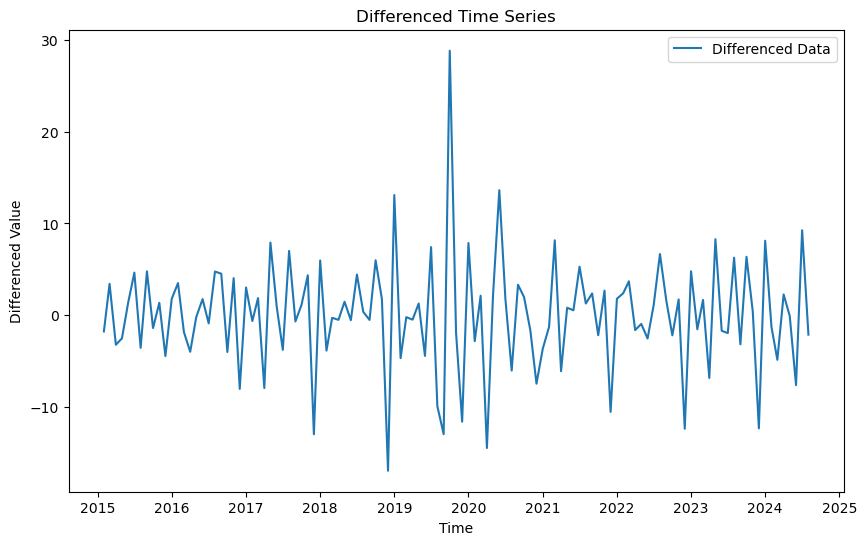

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(df_ire_dff, label='Differenced Data')
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

In [71]:
df_ire_dff.head()

Value
Year             
2015-02-01  -1.79
2015-03-01   3.41
2015-04-01  -3.24
2015-05-01  -2.54
2015-06-01   1.40

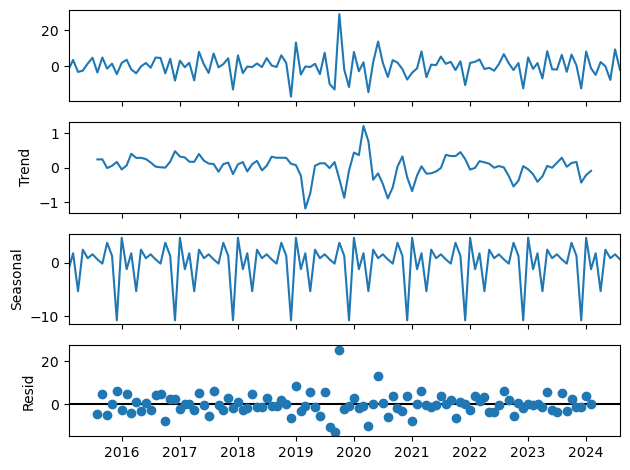

In [72]:
res = sm.tsa.seasonal_decompose(df_ire_dff,period=12,model='additive').plot() # using additive model cause the data is not increasing by time
plt.show()

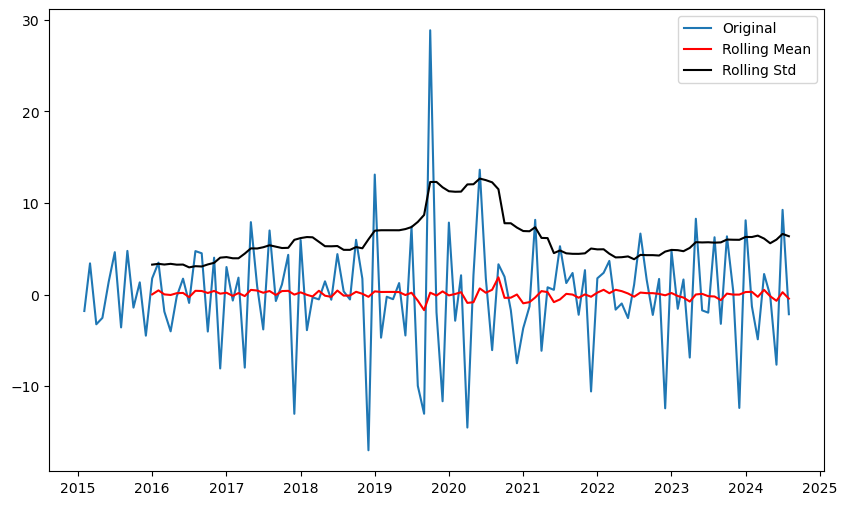

In [98]:
rolling_stat(df_ire_dff['Value'])

In [100]:
adf_test(df_ire_dff['Value'])

ADF Statistic: -4.1396511533776135
p-value: 0.0008322514670816689
Number of Observation used: 101
Critical Value 1%: -3.4968181663902103
Critical Value 5%: -2.8906107514600103
Critical Value 10%: -2.5822770483285953


In [102]:
if(-2.8906107514600103 > -4.1396511533776135):
    print('True')
else:
    print('False')

if(0.0008322514670816689 < 0.05):
    print('True')
else:
    print('False')

True
True


In [104]:
# the data is now stationary (no trends or seasonality), otherwise I would have to doublediff

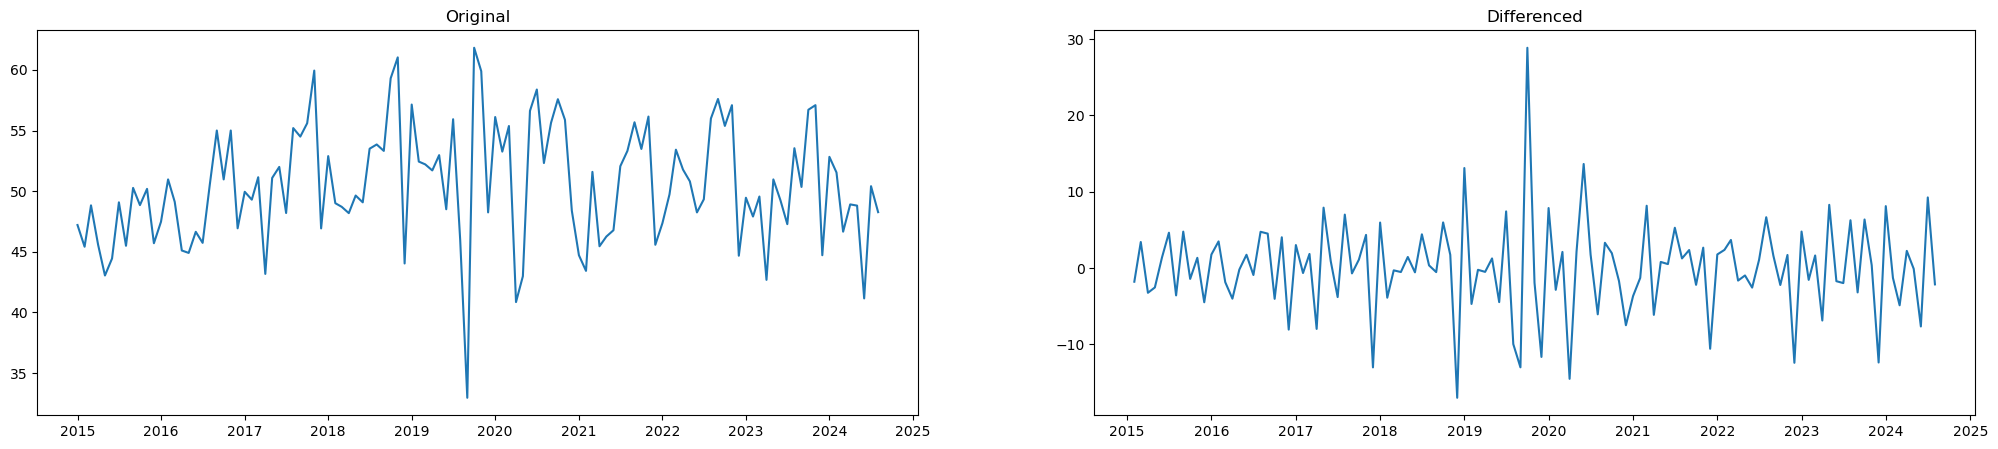

In [106]:
fig, axes = plt.subplots(1,2,figsize=(25,5))

axes[0].plot(df_ire);axes[0].set_title('Original')
axes[1].plot(df_ire_dff);axes[1].set_title('Differenced')
plt.show()

In [108]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [110]:
df_ire_dff

Value
Year             
2015-02-01  -1.79
2015-03-01   3.41
2015-04-01  -3.24
2015-05-01  -2.54
2015-06-01   1.40
...           ...
2024-04-01   2.25
2024-05-01  -0.10
2024-06-01  -7.65
2024-07-01   9.25
2024-08-01  -2.14

[115 rows x 1 columns]

In [112]:
#Split de difference data to find ARIMA best elements

train_data = '2023-01-01'
test_data = '2023-02-01'
train_dff = df_ire_dff.loc[:train_data]
test_dff = df_ire_dff.loc[test_data:]

In [114]:
train_dff.shape

(96, 1)

In [116]:
test_dff.shape

(19, 1)

In [118]:
#ARIMA
#Lets find the best measurement for our prediction (p,q and d)

#d id the number of times we did the difference so the data would de stationary. Our d is 1

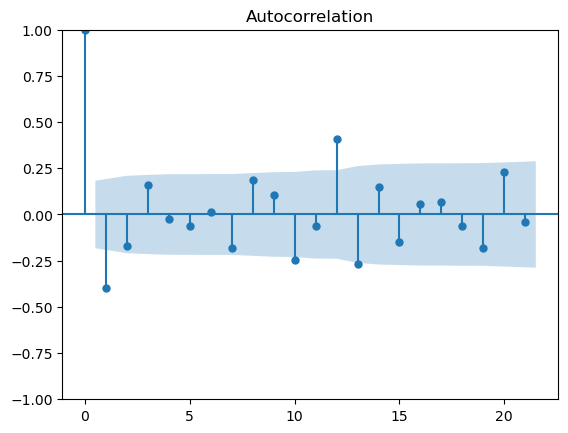

In [120]:
plot_acf(df_ire_dff)
plt.show()

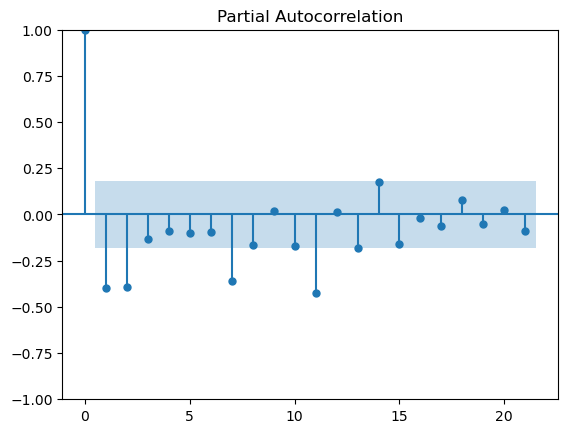

In [122]:
#to find q in ACF we need to find the first one that is close to the edge of the confidence area and go back one
#from the above ACF graph the lag is 2 so our q is 1

plot_pacf(df_ire_dff)
plt.show()

#to find p in PACF we need to find the first one that is close to the edge of the confidence area 

In [124]:
#in this case it is the number 4, so we go back one
# our p is 3

In [126]:
#Split Original dataset


train = df_ire.loc[:train_data]
test = df_ire.loc[test_data:]

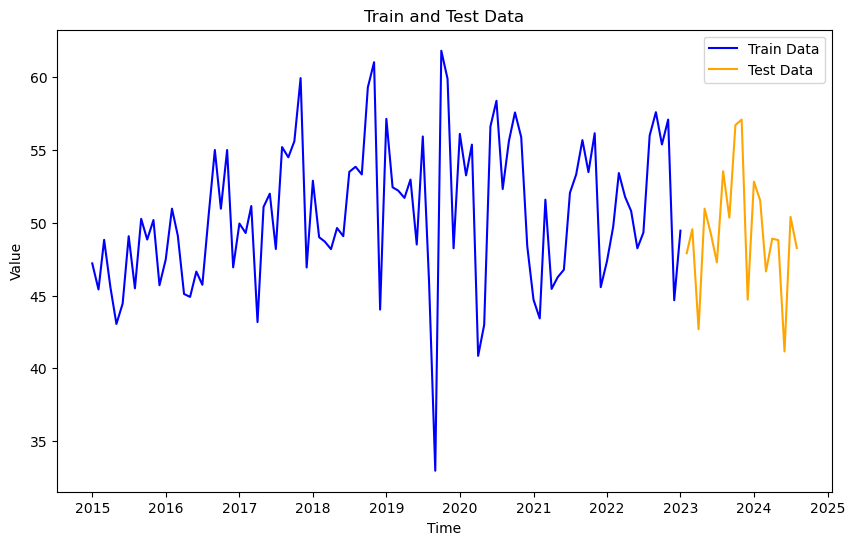

In [128]:
def split_time(a,b):
    plt.figure(figsize=(10, 6))
    plt.plot(a.index, a['Value'], label='Train Data', color='blue')
    plt.plot(b.index, b['Value'], label='Test Data', color='orange')
    #plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Train-Test Split')  # Mark the split
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Train and Test Data')
    plt.legend()
    plt.show()

split_time(train,test)

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [132]:
df_ire

Value
Year             
2015-01-01  47.21
2015-02-01  45.42
2015-03-01  48.83
2015-04-01  45.59
2015-05-01  43.05
...           ...
2024-04-01  48.91
2024-05-01  48.81
2024-06-01  41.16
2024-07-01  50.41
2024-08-01  48.27

[116 rows x 1 columns]

In [134]:
train_dff

Value
Year             
2015-02-01  -1.79
2015-03-01   3.41
2015-04-01  -3.24
2015-05-01  -2.54
2015-06-01   1.40
...           ...
2022-09-01   1.61
2022-10-01  -2.22
2022-11-01   1.71
2022-12-01 -12.41
2023-01-01   4.78

[96 rows x 1 columns]

In [146]:
#I have tested difference valeus to create predictions with no good result
# I will test with auto_arima to provide the best valeus automatically, and I will try another prediction
from pmdarima import auto_arima
# 

# auto_model = auto_arima(y=train_dff, 
#                    start_p=0, max_p=12, 
#                    start_q=0, max_q=12, 
#                    d=1,  # Diferenciação já aplicada
#                    seasonal=False,  # Defina como True se houver sazonalidade
#                    stepwise=False)
# print(auto_model.summary())

In [148]:
#Arime order=(q,d,p)

#arima = sm.tsa.arima.ARIMA(train, order=(1,1,3))
# arima = sm.tsa.arima.ARIMA(train_dff, order=(6,1,1))
# model = arima.fit()
# model.summary()

In [150]:
# Fit auto_arima to your training data

def sarimax(input):
    auto_model = auto_arima(
        input, 
        seasonal=True,           # Enable seasonal model
        m=12,                    # Seasonal period (e.g., 12 for monthly data)
        stepwise=True,           # Perform stepwise search to reduce computation
        suppress_warnings=True,  # Suppress convergence warnings
        error_action='ignore',   # Ignore if a model fails
        max_p=7, max_q=7,        # Maximum p and q values
        max_P=7, max_Q=7,        # Maximum seasonal P and Q
        max_order=None,          # Maximum order (sum of p, q, P, Q)
        trace=True               # Print the progress
    )

    # Print the best parameters
    print(auto_model.summary())

sarimax(train_dff)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=627.798, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=599.332, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=625.800, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=615.841, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=601.193, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=601.147, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=600.881, Time=0.05 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=603.121, Time=0.20 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=610.451, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=584.665, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=602.700, Time=0.02 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=586.514, Time=0.14 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AI

In [154]:
# Extract parameters from auto_arima
#best_order = auto_model.order  # (p, d, q)
#est_seasonal_order = auto_model.seasonal_order  # (P, D, Q, s)

# Fit SARIMAX model
#sarimax_model = SARIMAX(train_dff, order=best_order,seasonal_order=best_seasonal_order)

#sarimax_model = SARIMAX(train_dff, order=(5, 1, 1), seasonal_order=(1, 0, 1, 12)) #melhor ate entao
sarimax_model = SARIMAX(train_dff, order=(6, 0, 2), seasonal_order=(1, 0, 1, 12))
Smodel = sarimax_model.fit()

# Print summary
print(Smodel.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                      SARIMAX Results                                       
Dep. Variable:                                Value   No. Observations:                   96
Model:             SARIMAX(6, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -276.165
Date:                              Tue, 10 Dec 2024   AIC                            574.329
Time:                                      14:15:27   BIC                            602.537
Sample:                                  02-01-2015   HQIC                           585.731
                                       - 01-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2014      1.302      0.155      0.877      -2.350       2.753
ar.L2         -0.18

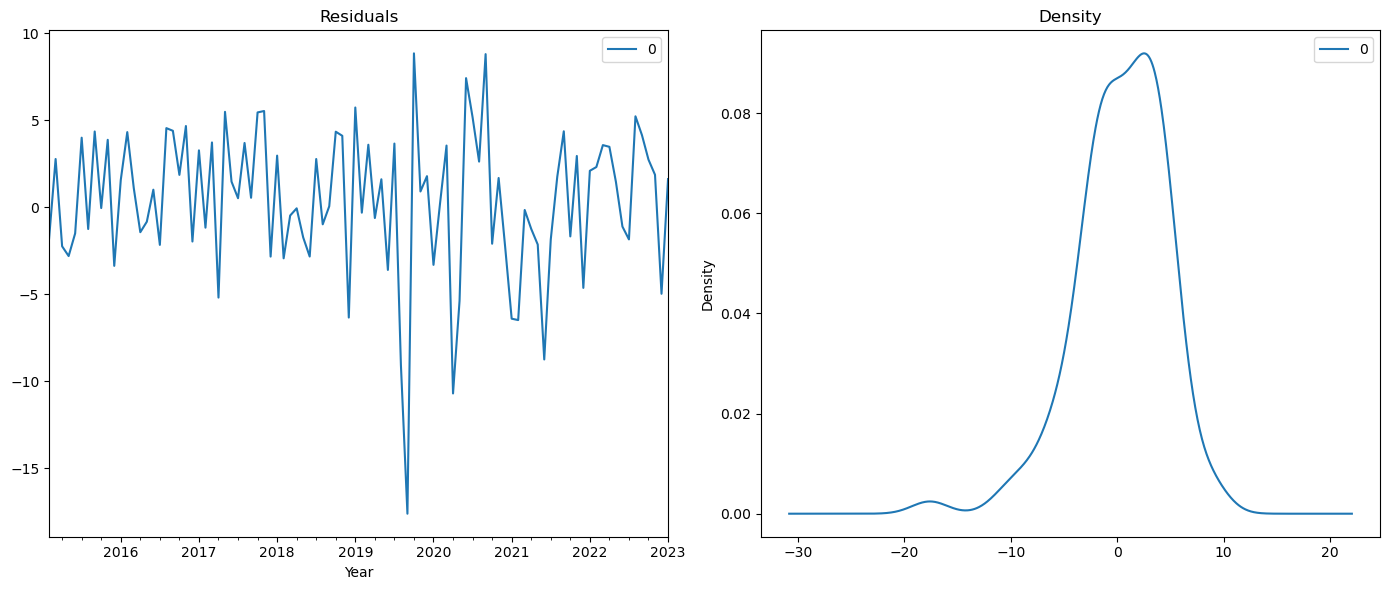

In [155]:
#residual errors
def residual(input):
    residual = pd.DataFrame(input.resid)
    fig, ax = plt.subplots(1,2, figsize=(14, 6)) #1 line 2 columns
    residual.plot(title='Residuals',ax=ax[0])
    residual.plot(kind='kde',title='Density', ax=ax[1])
    plt.tight_layout()  # better space between them
    plt.show()

residual(Smodel)

In [158]:
#all the residuals shows around 0 and the Distribution shows also around 0, so mean and variance is constant ( bell curve

In [160]:
train

Value
Year             
2015-01-01  47.21
2015-02-01  45.42
2015-03-01  48.83
2015-04-01  45.59
2015-05-01  43.05
...           ...
2022-09-01  57.60
2022-10-01  55.38
2022-11-01  57.09
2022-12-01  44.68
2023-01-01  49.46

[97 rows x 1 columns]

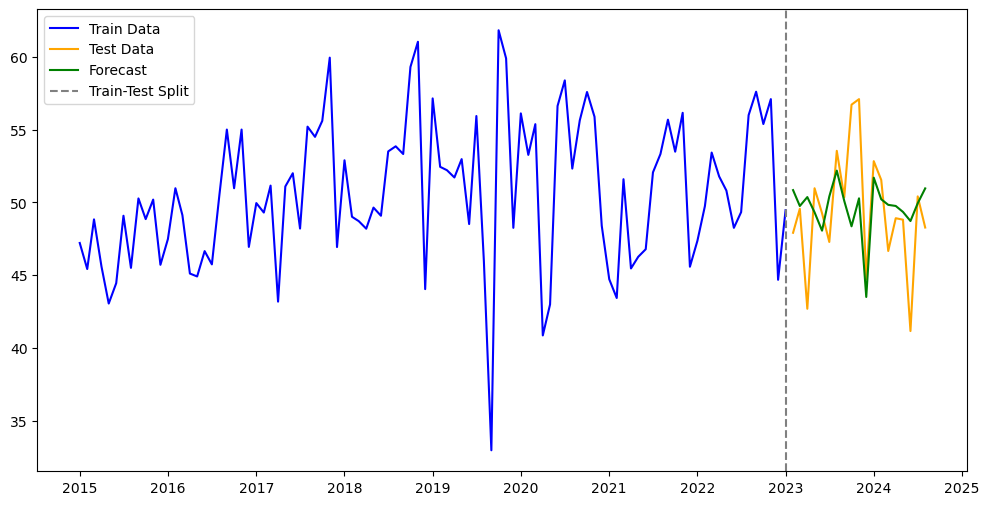

In [296]:
# Obtain the predicted differenced values
forecast_diff = Smodel.get_forecast(steps=len(test))
forecast_mean = forecast_diff.predicted_mean
    
# Add the last known value to forecasted differences to get the final forecast
forecast_original = forecast_mean + train['Value'].iloc[-1]
#forecast_original = forecast_mean.cumsum() + train['Value'].iloc[-1]
def forecast(a,b,c):
    plt.figure(figsize=(12, 6))
    plt.plot(b.index, b['Value'], label='Train Data', color='blue')
    plt.plot(c.index, c['Value'], label='Test Data', color='orange')
    plt.plot(a.index, a, label='Forecast', color='green')
    plt.axvline(x=b.index[-1], color='gray', linestyle='--', label='Train-Test Split')
    plt.legend()
    plt.show()


forecast(forecast_original,train,test)

In [288]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate performance metrics
mae = mean_absolute_error(test, forecast_original)
mse = mean_squared_error(test, forecast_original)
rmse = mean_squared_error(test, forecast_original, squared=False)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 2.7629401807199194, MSE: 14.721504181745175, RMSE: 3.836861240877128


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



I have tried different values in ARIMA and SARIMAX and the result above was the best one I could get, however I am not happy with this prediction. The Mean Absolute Error is 2.76, it shows a high deviation between predicted and original values. 
Also, the Root Mean Squared Error is 3.84 indicates that the model's forecast errors are not negligible.

In [407]:
#Based on the residual I believe it is not overfitting, but I will try again using less data 

In [409]:
df_short2 = df

In [171]:
df_new2 = df_short2[df_short2['Country'].isin(['Italy', 'Spain', 'Ireland', 'Poland'])]
df_new2

Country       Year  Value ISO_Code Year_Month
1963    Spain 2010-01-01  47.14      ESP    2010-01
3354    Italy 2010-01-01  95.76      ITA    2010-01
4662   Poland 2010-01-01  22.81      POL    2010-01
3023  Ireland 2010-01-01  41.16      IRL    2010-01
1964    Spain 2010-02-01  44.90      ESP    2010-02
...       ...        ...    ...      ...        ...
3198  Ireland 2024-08-01  48.27      IRL    2024-08
3529    Italy 2024-08-01  55.37      ITA    2024-08
2138    Spain 2024-08-01  60.07      ESP    2024-08
3199  Ireland 2024-09-01  54.84      IRL    2024-09
3530    Italy 2024-09-01  58.04      ITA    2024-09

[706 rows x 5 columns]

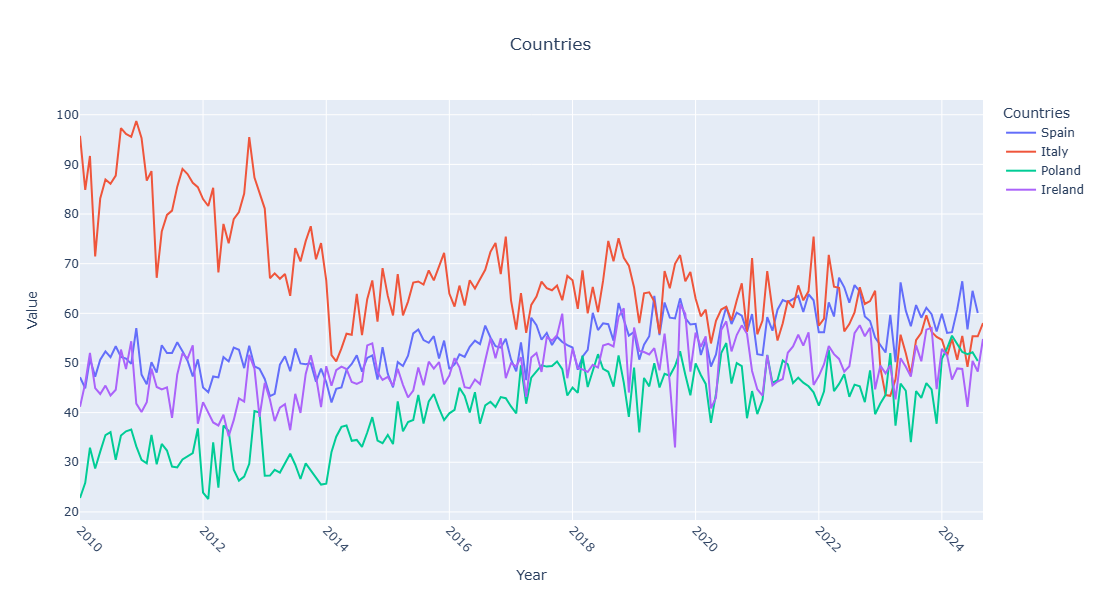

In [173]:
plot_simple(df_new2)

In [175]:
le = LabelEncoder()

df_new2['Country_Encoded'] = le.fit_transform(df_new2['Country'])

C:\Users\Leandro Andrade\AppData\Local\Temp\ipykernel_19180\4135786707.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
df_new2 = df_new2[df_new2['Year'] < '2024-09-01']

df_new2['Country'].value_counts()

Country
Spain      176
Italy      176
Poland     176
Ireland    176
Name: count, dtype: int64

In [179]:
df_new2.reset_index(drop=True, inplace=True)

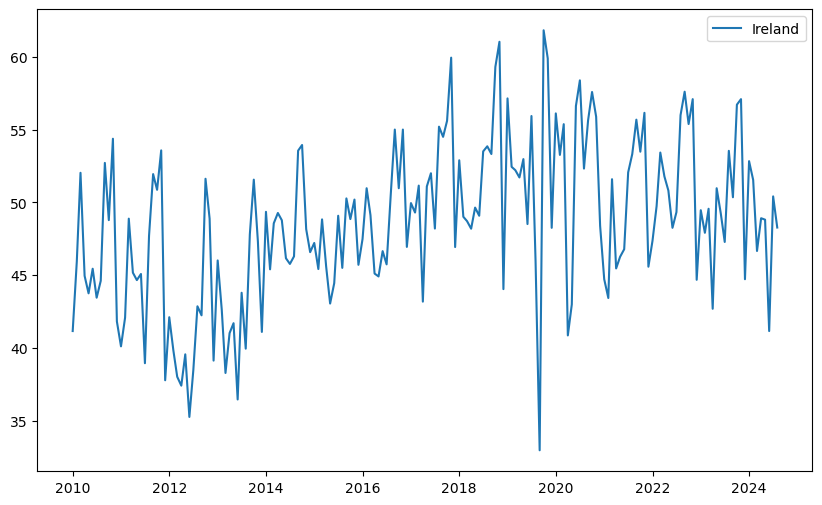

In [181]:
df_ire2 = df_new2[df_new2['Country_Encoded'] == 0]
df_ire2.set_index('Year', inplace=True)
df_ire2.index.freq = 'MS'  # Replace 'MS' with the appropriate frequency
plt.figure(figsize=(10, 6))
plt.plot(df_ire2['Value'], label='Ireland')
plt.legend()
plt.show()

In [183]:
df_ire2 = df_ire2.drop(['Country','ISO_Code','Year_Month','Country_Encoded'], axis=1)

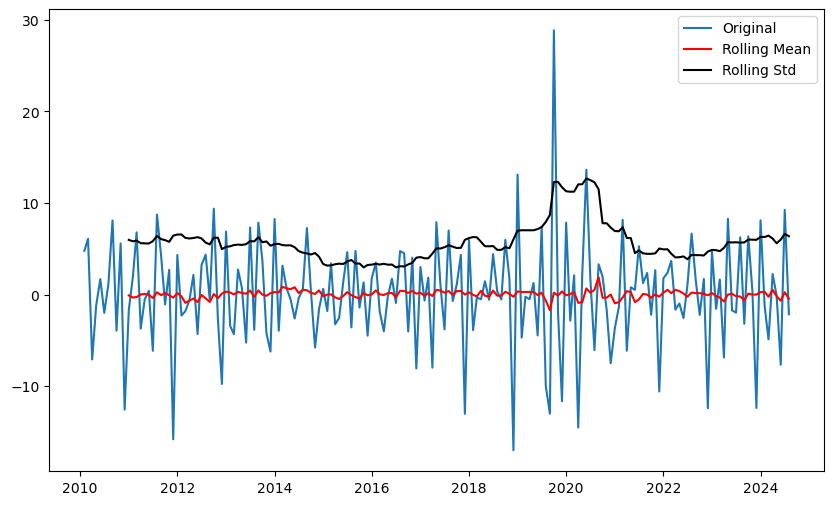

In [185]:
df_ire_dff2 = df_ire2.diff().dropna()
rolling_stat(df_ire_dff2['Value'])

In [187]:
adf_test(df_ire_dff2['Value'])

ADF Statistic: -5.074020786332806
p-value: 1.5807018510073455e-05
Number of Observation used: 160
Critical Value 1%: -3.4718957209472654
Critical Value 5%: -2.8797795410156253
Critical Value 10%: -2.5764947265625


In [189]:
if(-2.8796651107461972 > -5.074020786332806):
    print('True')
else:
    print('False')

if(1.5807018510073455e-05 < 0.05):
    print('True')
else:
    print('False')# it is stationary 

True
True


In [308]:
df_ire_dfftest = df_ire_dff2[df_ire_dff2.index > '2020-01-01']
df_iretest = df_ire2[df_ire2.index > '2020-01-01']

train_data2 = '2024-01-01'
test_data2 = '2024-01-01'
train_dff2 = df_ire_dfftest.loc[:train_data2]
test_dff2 = df_ire_dfftest.loc[test_data2:]
train2 = df_iretest.loc[:train_data2]
test2 = df_iretest.loc[test_data2:]

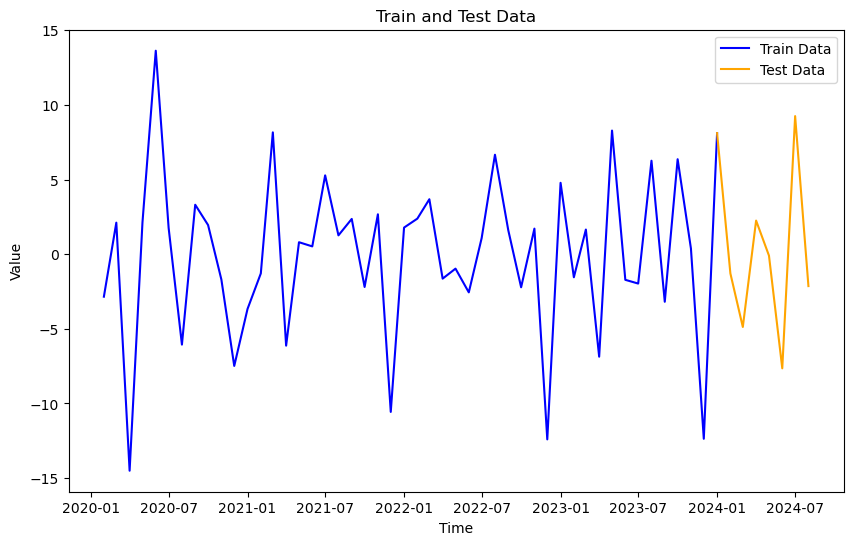

In [310]:
split_time(train_dff2,test_dff2)

In [312]:
sarimax(train_dff2)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=305.676, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=290.979, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=303.683, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=303.783, Time=0.00 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=291.458, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=291.043, Time=0.02 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=287.424, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=303.098, Time=0.02 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=288.888, Time=0.10 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=288.087, T

In [390]:
#sarimax_model2 = SARIMAX(train_dff2, order=(3, 0, 1), seasonal_order=(0, 0, 1, 12)) #melhor ate entao
sarimax_model2 = SARIMAX(train_dff2, order=(4, 0, 0), seasonal_order=(1, 0, 1, 12))
Smodel2 = sarimax_model2.fit()

# Print summary
print(Smodel2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Value   No. Observations:                   48
Model:             SARIMAX(4, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -136.083
Date:                              Tue, 10 Dec 2024   AIC                            286.166
Time:                                      15:03:33   BIC                            299.265
Sample:                                  02-01-2020   HQIC                           291.116
                                       - 01-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4514      0.150     -3.012      0.003      -0.745      -0.158
ar.L2         -0.54

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



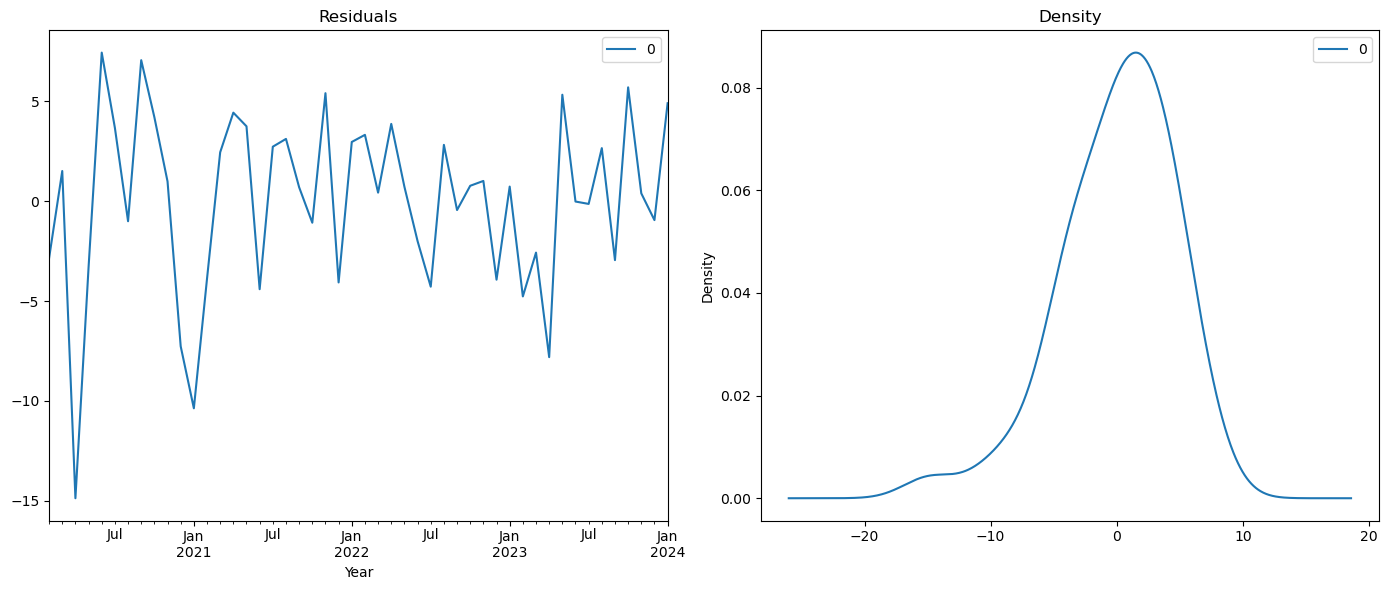

In [392]:
residual(Smodel2)

In [394]:
test_dff2

Value
Year             
2024-01-01   8.11
2024-02-01  -1.29
2024-03-01  -4.88
2024-04-01   2.25
2024-05-01  -0.10
2024-06-01  -7.65
2024-07-01   9.25
2024-08-01  -2.14

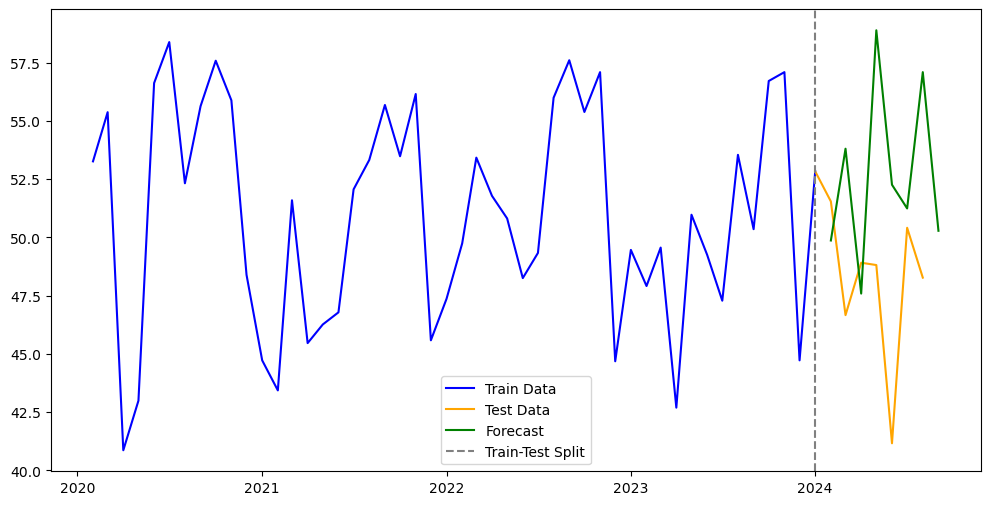

In [396]:
# Obtain the predicted differenced values
forecast_diff2 = Smodel2.get_forecast(steps=len(test_dff2))
forecast_mean2 = forecast_diff2.predicted_mean
    
# Add the last known value to forecasted differences to get the final forecast
forecast_original2 = forecast_mean2 + train2['Value'].iloc[-1]
#forecast_original2 =  forecast_mean.cumsum() + train['Value'].iloc[-1]
forecast(forecast_original2,train2,test2)

In [398]:
# Calculate performance metrics
mae = mean_absolute_error(test2, forecast_original2)
mse = mean_squared_error(test2, forecast_original2)
rmse = mean_squared_error(test2, forecast_original2, squared=False)
#Previous result MAE: 2.7629401807199194, MSE: 14.721504181745175, RMSE: 3.836861240877128
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 4.793534158326783, MSE: 34.55617418139725, RMSE: 5.878449981193788


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

